In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio #this is a special package for interpreting LAS well logs

In [594]:
#load the LAS file 
las = lasio.read(r'4238330836_10682340.las')

In [605]:
#if the file has header info we can see it here
las.well.api.value

'42383308360000'

In [596]:
#some files don't have header info, we will input it in manually
file_name = '4238330836_10682340.las'
name = file_name.split('_', 1)
name[0]

#you could also do
# las.well.api = 'API number'
# but the API number is in the file name so this isn't too necessary

'4238330836'

In [597]:
#visualizing the LAS data, many times they will be missing some values
las.curves
df = las.df()
df

,CAL,DPHI,DT,GR,LLD,LLS,NPHI,RHOB
DEPT,,,,,,,,
120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0437
9258.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0434
9259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0434


In [598]:
#we have a lot of missing log sections with this file
df.isna().sum()

CAL     4743
DPHI    4782
DT      4785
GR       212
LLD     4801
LLS     4798
NPHI      91
RHOB    4766
dtype: int64

In [599]:
#sometimes we might want to only view the sections logged, if so we can .dropna()
# df = df.dropna(axis = 0)
df = df.reset_index()
df = df.rename(columns = {'DEPT': 'DEPTH'})
df

,DEPTH,CAL,DPHI,DT,GR,LLD,LLS,NPHI,RHOB
0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,121.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
18276,9258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0437
18277,9258.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0434
18278,9259.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0434
18279,9259.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0434


In [606]:
#function to automatically plot and scale all well logs in the LAS file SELECTED IN ABOVE DF
def log_plot(logs):
    logs = logs.sort_values(by='DEPTH')
    top = logs.DEPTH.min()
    bot = logs.DEPTH.max()
    
    #create # of subplots = # of logs
    f, ax = plt.subplots(nrows=1, ncols= len(logs.columns) -1, figsize=(10,12))
    
    #scaling and plotting of logs
    for x in range(len(logs.columns)):
        if x != len(df.columns) - 1:
            ax[x].plot(logs[logs.columns[x + 1]], logs.DEPTH, color = 'r')
            ax[x].set_xlabel(logs.columns[x + 1])
            ax[x].invert_yaxis()
            ax[x].set_ylim(top,bot)
            ax[x].invert_yaxis()
            ax[x].grid()
            ax[x].set_xlabel('{}'.format(logs.columns[x + 1]))
            ax[0].set_ylabel("Depth")
            ax[x].set_xlim(logs[logs.columns[x + 1]].min() - 1/5 * logs[logs.columns[x + 1]].max(),
                           logs[logs.columns[x + 1]].max() + 1/5 * logs[logs.columns[x + 1]].max())
            
            #rotate xticks for all subplots, PFM
            plt.setp( ax[x].xaxis.get_majorticklabels(), rotation=-45 )
            
            #remove ylabels for all subplots but first
            for i in range(1, len(logs.columns)-1):
                ax[i].yaxis.set_ticklabels([])
            
            if logs.columns[x + 1] == 'GR':
                ax[x].fill_betweenx(logs.DEPTH, logs[logs.columns[x + 1]] , 0)
                
       
    
    f.suptitle('{}'.format(name[0]), fontsize=14,y=0.94)
    #plt.plot()

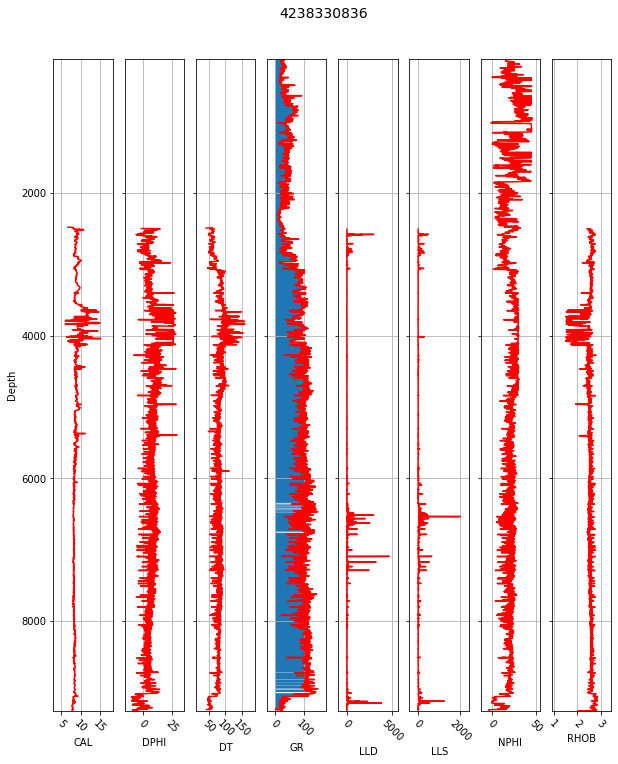

In [607]:
log_plot(df)

In [609]:
#This is the charting function original used

# def log_plot(logs):
#     logs = logs.sort_values(by='DEPTH')
#     top = logs.DEPTH.min()
#     bot = logs.DEPTH.max()
    
#     f, ax = plt.subplots(nrows=1, ncols= len(df.columns) -1, figsize=(4,12))
#     ax[0].plot(logs.GR, logs.DEPTH, color='green')
#     ax[1].plot(logs.ILD, logs.DEPTH, color='red')

    
#     for i in range(len(ax)):
#         ax[i].set_ylim(top,bot)
#         ax[i].invert_yaxis()
#         ax[i].grid()
        
#     ax[0].set_xlabel("GR")
#     ax[0].set_xlim(0,250)
#     ax[0].set_ylabel("Depth(ft)")
#     ax[1].set_xlabel("ILD")
#     ax[1].set_xlim(logs.ILD.min()-10000,logs.ILD.max())
    
    
#     ax[1].set_yticklabels([])
    
#     f.suptitle('Well: API Here', fontsize=14,y=0.94)